# Segmentation - Voronoi-Otsu-Labeling and StarDist

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
from tifffile import imwrite
import os
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling
import matplotlib.pyplot as plt

In this jupyter notebook, a dataset by [Ozpolat, B. et al](https://doi.org/10.5281/zenodo.1063531) licensed [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) was used.

## Rescaling

In [2]:
img = imread("../../imgs/tp7_channel1.tif")

In [3]:
#getting the image shape in order (channel,z,y,x)
print('pixels (z, y, x) = ', img.shape)

pixels (z, y, x) =  (44, 1024, 1024)


In [4]:
#adjusted new idea
scale_factor_x = 0.25
scale_factor_y = 0.25
scale_factor_z = 2.3485

In [5]:
#rescale
img_rescaled_cle = cle.scale(img, factor_x = scale_factor_x, factor_y = scale_factor_y, factor_z = scale_factor_z, auto_size = True)

In [6]:
#print image shape
print('pixels (z, y, x) = ', img_rescaled_cle.shape)

pixels (z, y, x) =  (103, 256, 256)


In [7]:
save_dir = '../../imgs/'
filename = 'tp7_channel1_rescaled(256x256x103).tif'

In [8]:
imwrite(os.path.join(save_dir, filename), img_rescaled_cle)

## Segmentation 

### Using Voronoi-Otsu-Labeling

[Voronoi-Otsu-Labeling](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20_image_segmentation/11_voronoi_otsu_labeling.html) is a combination of Gaussian blur, spot detection, thresholding and binary watershed.

In [9]:
voronoi_otsu_label = voronoi_otsu_labeling(img_rescaled_cle, spot_sigma = 5, outline_sigma = 2)

The following `show` was taken and modified from [this jupyter notebook](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/19_spatial_transforms/scaling.html).

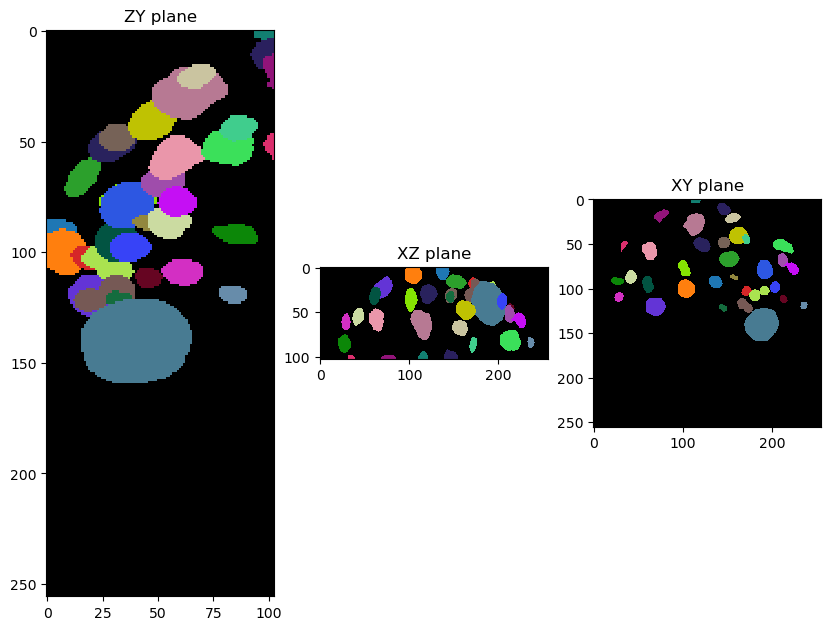

In [10]:
def show(image_to_show, labels=True):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    cle.imshow(projection_x, plot=axs[0], labels=True)
    cle.imshow(projection_y, plot=axs[1], labels=True)
    cle.imshow(projection_z, plot=axs[2], labels=True)
    axs[0].set_title("ZY plane")
    axs[1].set_title("XZ plane")
    axs[2].set_title("XY plane")
    plt.show()

show(voronoi_otsu_label)

### Using StarDist

This StarDist model was trained as explained in [this image.sc post](https://forum.image.sc/t/using-pretrained-stardist-2d-model-for-training-of-a-stardist-3d-model/75502/3).

In [12]:
stardist_label = imread('../../imgs/tp7_channel1_rescaled(256x256x103)_stardist_label_image.tif')

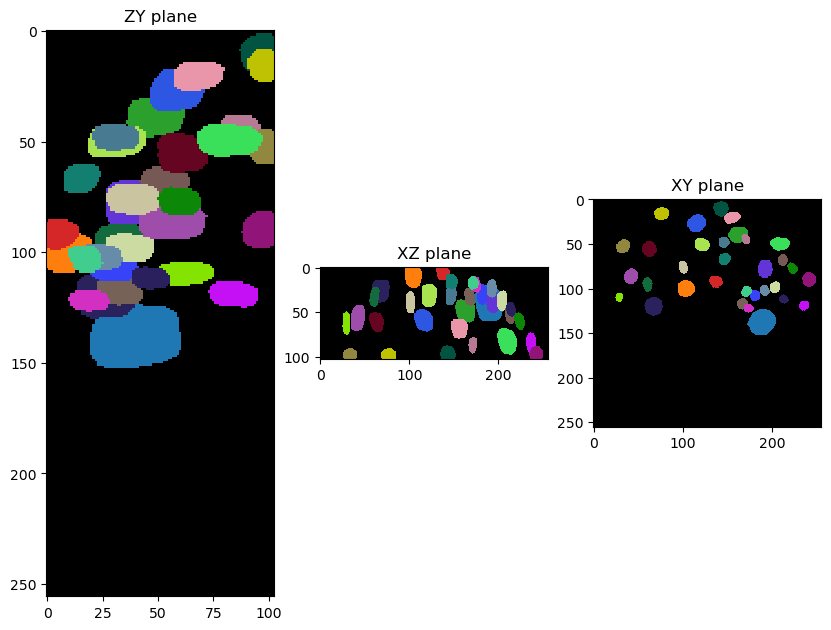

In [13]:
def show(image_to_show, labels=True):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    cle.imshow(projection_x, plot=axs[0], labels=True)
    cle.imshow(projection_y, plot=axs[1], labels=True)
    cle.imshow(projection_z, plot=axs[2], labels=True)
    axs[0].set_title("ZY plane")
    axs[1].set_title("XZ plane")
    axs[2].set_title("XY plane")
    plt.show()

show(stardist_label)